In [28]:
import os
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [29]:
data_dir = 'C:/Users/Windows10/Desktop/코딩/data/archive (1)/chest_xray'

In [30]:
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
val_dir = os.path.join(data_dir, 'val')

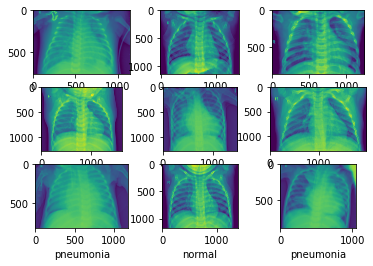

In [31]:
for i in range(9):
    plt.subplot(3,3,i + 1)
    if (i + 1) %2 == 0:
        image = img.imread(glob(os.path.join(train_dir, 'NORMAL/*'))[i])
        label = 'normal'
    else:
        image = img.imread(glob(os.path.join(train_dir, 'PNEUMONIA/*'))[i])
        label = 'pneumonia'

    plt.imshow(image)
    plt.xlabel(label)

plt.show()


In [32]:
train_gen = ImageDataGenerator(
    rescale = 1/255,
    width_shift_range= 0.2,
    height_shift_range=0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
)

test_gen = ImageDataGenerator(
    rescale = 1/255,
)

val_gen = ImageDataGenerator(
    rescale = 1/255
)

In [33]:
train_set = train_gen.flow_from_directory(
    train_dir,
    target_size = (180, 180),
    class_mode = 'binary',
    batch_size = 64,
)

test_set = test_gen.flow_from_directory(
    test_dir,
    target_size = (180, 180),
    class_mode = 'binary',
    batch_size = 64,
)

val_set = val_gen.flow_from_directory(
    val_dir,
    target_size = (180, 180),
    batch_size = 64,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [34]:
model = Sequential([
    Conv2D(64, 3, padding = 'same', activation= 'relu', input_shape = (180, 180, 3)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(128, 3, padding= 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(128, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(256, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(512, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(512, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(1024, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

model.summary()

import pydot
import graphviz
from tensorflow.keras.utils import plot_model

plot_model(model)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 180, 180, 64)      1792      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 90, 90, 128)       73856     
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 45, 45, 128)       0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 45, 45, 128)       147584    
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 22, 22, 256)     

In [35]:
model.compile(loss = 'binary_crossentropy', optimizer= 'rmsprop', metrics = ['acc'])

In [36]:
es = EarlyStopping(monitor= 'val_loss', patience= 5, verbose= 1)
mc = ModelCheckpoint(filepath= os.path.join(data_dir, 'log'), monitor= 'val_loss', save_weights_only= True, save_freq= 'epoch')

In [37]:
callbacks = [es, mc]

In [38]:
history = model.fit_generator(train_set, steps_per_epoch= 50, epochs = 50, callbacks = callbacks, validation_data = test_set, validation_steps = 5)

Epoch 1/50
50/50 [==============================] - 339s 7s/step - loss: 0.7996 - acc: 0.7200 - val_loss: 0.6679 - val_acc: 0.6156
Epoch 2/50
50/50 [==============================] - 334s 7s/step - loss: 0.5720 - acc: 0.7375 - val_loss: 0.6664 - val_acc: 0.6313
Epoch 3/50
50/50 [==============================] - 326s 6s/step - loss: 0.5113 - acc: 0.7421 - val_loss: 0.6460 - val_acc: 0.6250
Epoch 4/50
50/50 [==============================] - 330s 7s/step - loss: 0.4416 - acc: 0.7850 - val_loss: 0.5348 - val_acc: 0.7156
Epoch 5/50
50/50 [==============================] - 340s 7s/step - loss: 0.3924 - acc: 0.8321 - val_loss: 0.9284 - val_acc: 0.5688
Epoch 6/50
50/50 [==============================] - 336s 7s/step - loss: 0.3971 - acc: 0.8381 - val_loss: 0.5646 - val_acc: 0.7063
Epoch 7/50
50/50 [==============================] - 324s 6s/step - loss: 0.3446 - acc: 0.8501 - val_loss: 0.5301 - val_acc: 0.7219
Epoch 8/50
50/50 [==============================] - 342s 7s/step - loss: 0.3775 - a

KeyboardInterrupt: 